In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./Data/data2.csv', sep=';')
parameters="Alloy grade", "Ni", "Cr", "Co", "Fe", "Al", "Ti", "Nb", "Mo", "W", "C", "B", "Zr", "Test temperature (℃)", "Test stress (Mpa)", "solution treatment temperature", "solution treatment time", "γ'/γ'' phases dissolution temperature (℃)", "Stable aging temperature (℃)", "Stable aging time (h)", "Aging temperature (℃)", "Aging time (h)", "Creep rupture life"

df = df[["Ni", "Cr", "Co", "Fe", "Al", "Ti", "Nb", "Mo", "W", "C", "B", "Zr", "Test temperature (℃)","Test stress (Mpa)", "solution treatment temperature", "solution treatment time","Stable aging temperature (℃)", "Stable aging time (h)", "Aging temperature (℃)", "Aging time (h)", "Creep rupture life",]]
df.rename(columns={"Test temperature (℃)": "Test temperature (℃)", "Test stress (Mpa)": "Test stress (Mpa)", "Stable aging temperature (℃)": "Stable aging temperature (℃)", "Stable aging time (h)": "Stable aging time (h)", "Aging temperature (℃)": "Aging temperature (℃)", "Aging time (h)": "Aging time (h)"}, inplace=True)
df 

FileNotFoundError: [Errno 2] No such file or directory: './Data/data2.csv'

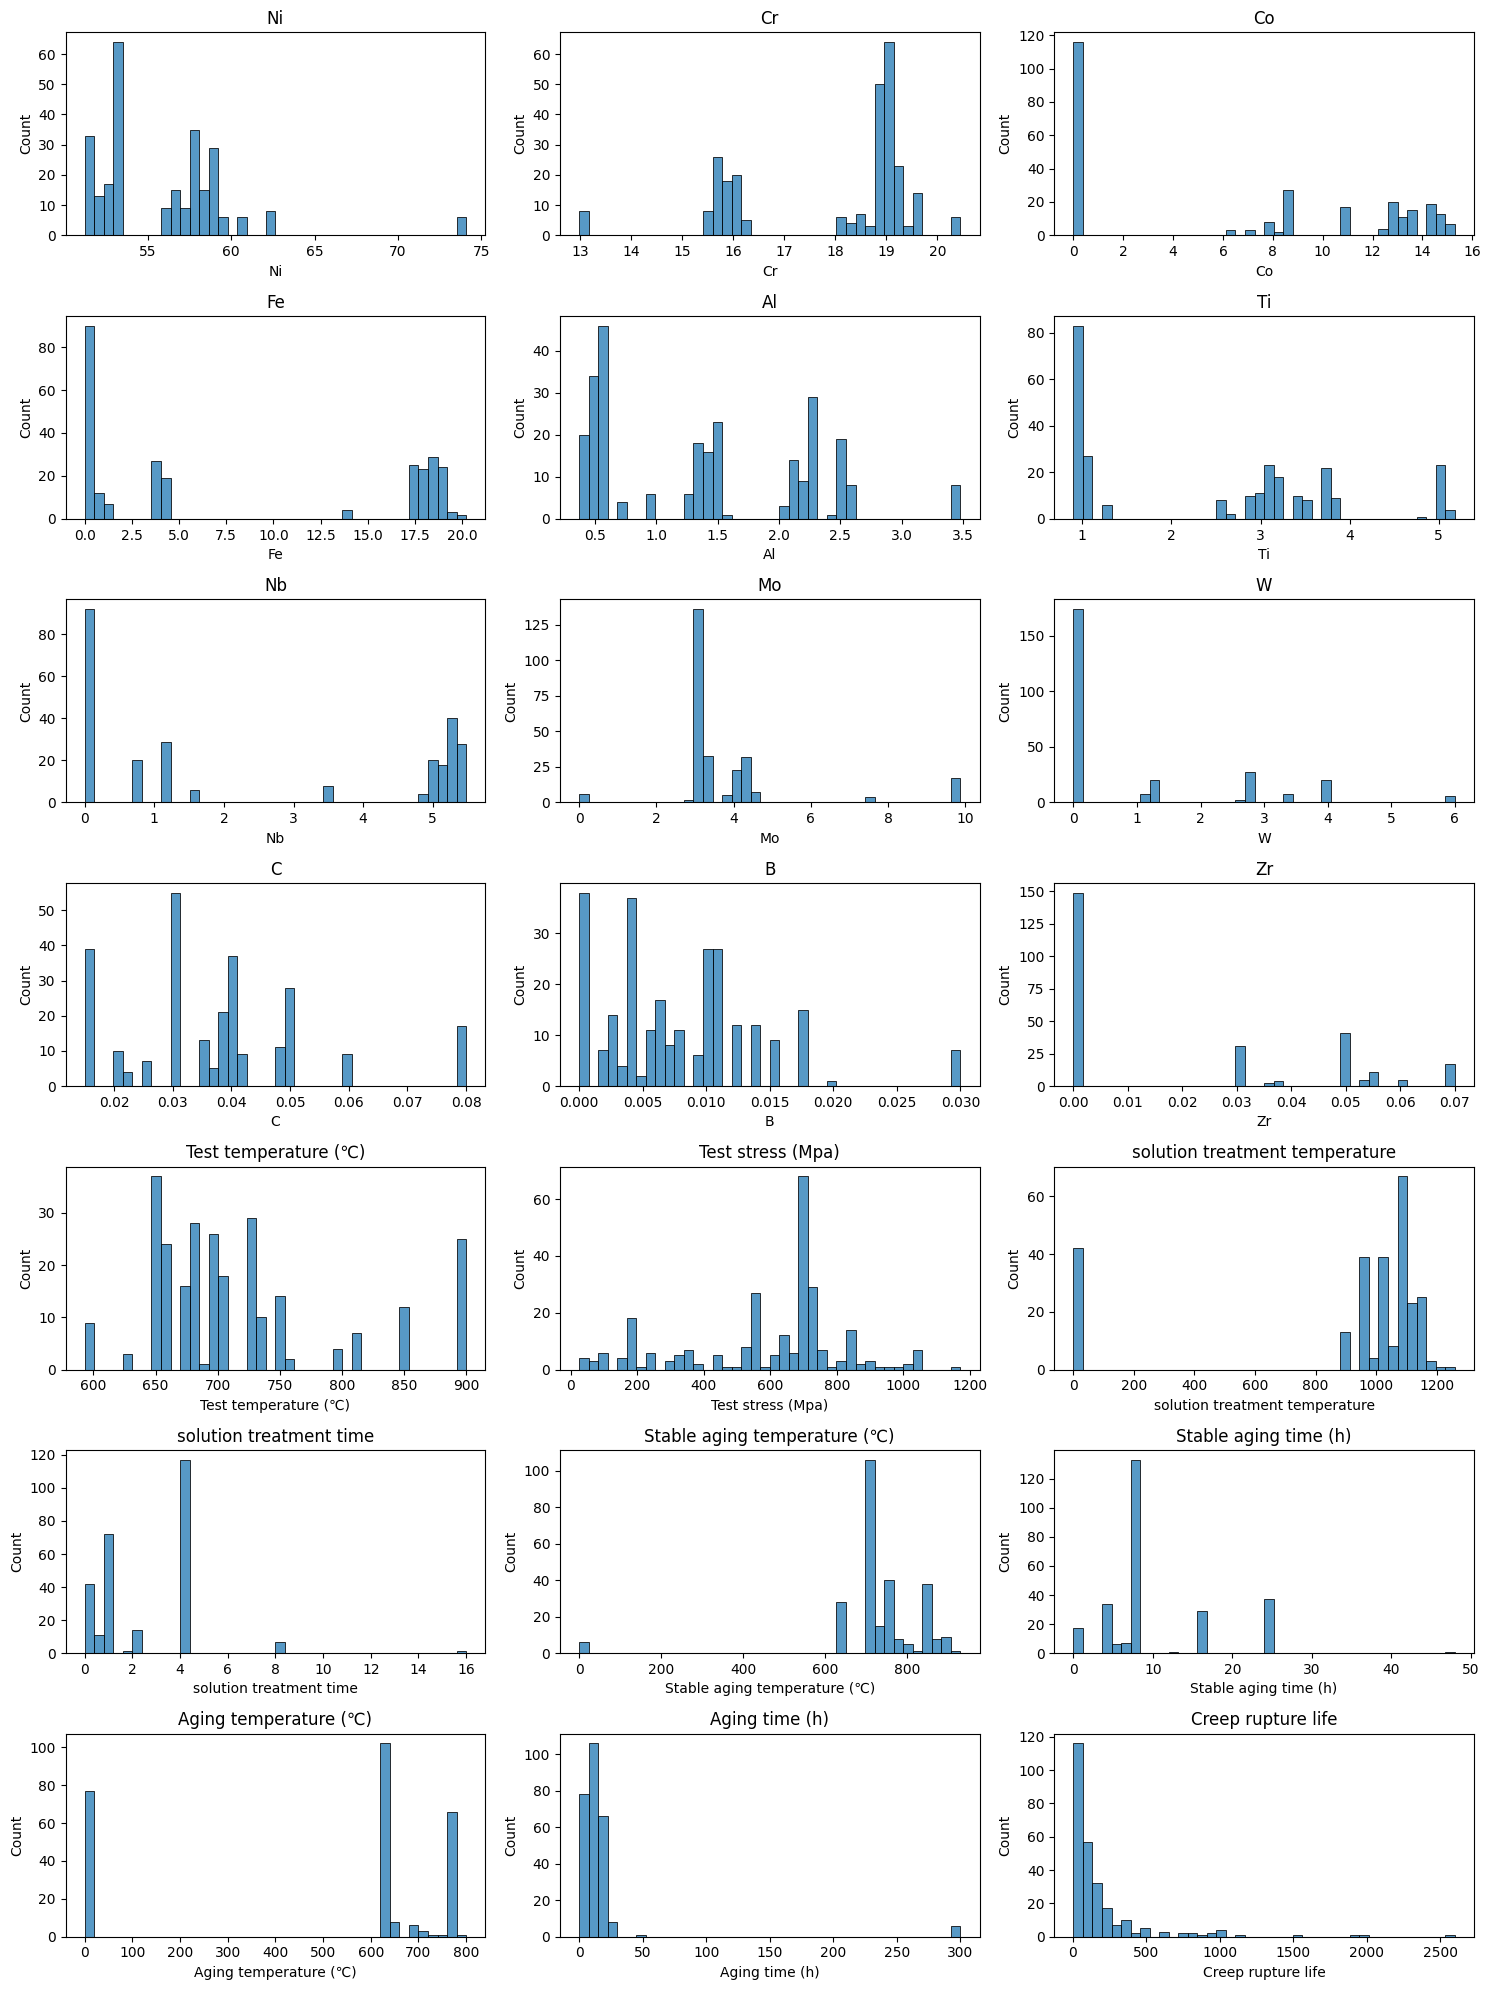

In [ ]:
import seaborn as sns
par = df.columns.to_list()
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for idx, column in enumerate(par):
    sns.histplot(df[column], bins=40, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 8 to 264
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ni                              99 non-null     float64
 1   Cr                              99 non-null     float64
 2   Co                              99 non-null     float64
 3   Fe                              99 non-null     float64
 4   Al                              99 non-null     float64
 5   Ti                              99 non-null     float64
 6   Nb                              99 non-null     float64
 7   Mo                              99 non-null     float64
 8   W                               99 non-null     float64
 9   C                               99 non-null     float64
 10  B                               99 non-null     float64
 11  Zr                              99 non-null     float64
 12  Test temperature (℃)            99 non-nul

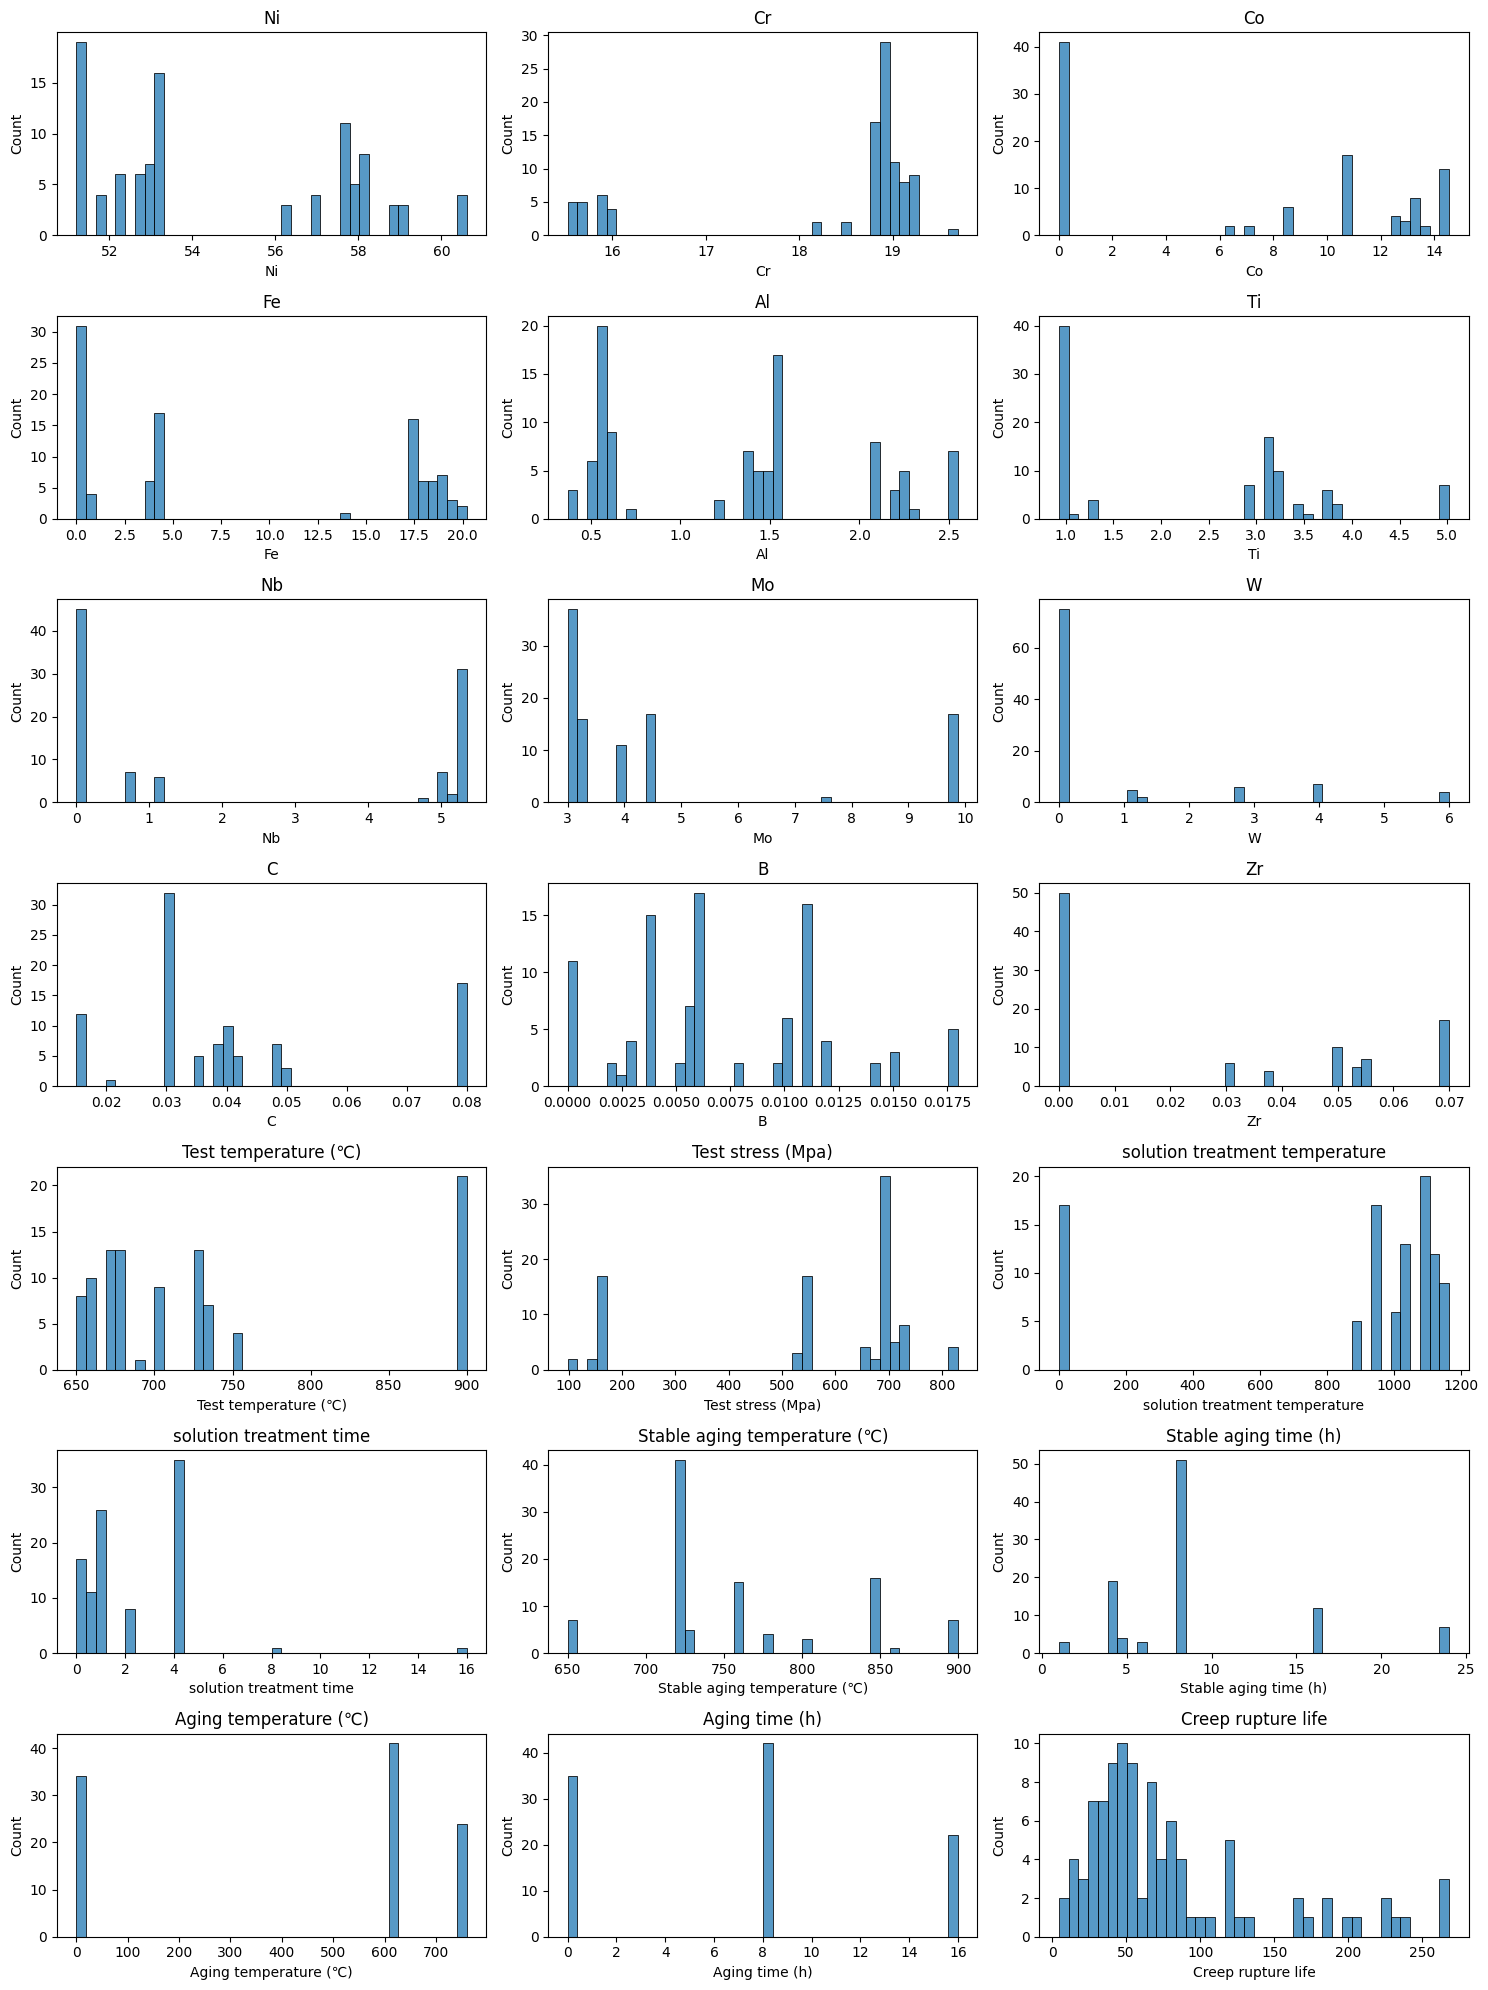

In [ ]:
from sklearn.cluster import DBSCAN
# 40 , 2
data = df.values
db = DBSCAN(eps=20, min_samples=2).fit(data)
labels = db.labels_
outliers = data[labels == -1]

df_cleaned = df[labels != -1]


df_cleaned.info()
par_cleaned = df_cleaned.columns.to_list()
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for idx, column in enumerate(par_cleaned):
    sns.histplot(df_cleaned[column], bins=40, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()
    

In [ ]:
df_cleaned.to_json('./Data/data2_cleaned.json')

In [ ]:
display(df_cleaned)

,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,Zr,Test temperature (℃),Test stress (Mpa),solution treatment temperature,solution treatment time,Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life
8,57.627,19.20,13.50,0.52,1.41,3.25,0.0,4.45,0.0,0.035,...,0.00,730,550,1020,4.0,845,4,760,16,71.1100
13,57.627,19.20,13.50,0.52,1.41,3.25,0.0,4.45,0.0,0.035,...,0.00,730,550,1020,4.0,860,4,760,16,66.8100
14,58.091,19.10,13.20,0.50,1.43,3.21,0.0,4.43,0.0,0.035,...,0.00,730,550,1020,4.0,845,4,760,0,77.1400
15,58.091,19.10,13.20,0.50,1.43,3.21,0.0,4.43,0.0,0.035,...,0.00,730,550,1020,4.0,845,4,760,8,73.8570
16,58.091,19.10,13.20,0.50,1.43,3.21,0.0,4.43,0.0,0.035,...,0.00,730,550,1020,4.0,845,4,760,16,75.7115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,0.080,...,0.07,900,170,1120,0.5,800,8,0,0,50.4500
261,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,0.080,...,0.07,900,170,1120,0.5,800,16,0,0,48.0000
262,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,0.080,...,0.07,900,170,1120,0.5,900,1,0,0,9.6800
263,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,0.080,...,0.07,900,170,1120,0.5,900,8,0,0,25.0000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Copy the cleaned dataframe
df_scaled_custom = df_cleaned.copy()

# Columns to scale with MinMaxScaler (exclude 'Creep rupture life')
minmax_cols = [col for col in df_cleaned.columns if col != 'Creep rupture life']

# Apply MinMaxScaler to all columns except 'Creep rupture life'
scaler = MinMaxScaler()
df_scaled_custom[minmax_cols] = scaler.fit_transform(df_cleaned[minmax_cols])

# Apply logarithmic scaling to 'Creep rupture life'
creep_life = df_cleaned['Creep rupture life'].values
# Avoid log(0) by adding a small constant if needed
creep_life_log = np.log1p(creep_life)
# Scale the log values to [0, 1]
creep_life_log_scaled = (creep_life_log - creep_life_log.min()) / (creep_life_log.max() - creep_life_log.min())
df_scaled_custom['Creep rupture life'] = creep_life_log_scaled

display(df_scaled_custom)
display(df_scaled_custom.describe())
df_scaled_custom.to_json('./Data/data2_scaled_custom.json')

,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,Zr,Test temperature (℃),Test stress (Mpa),solution treatment temperature,solution treatment time,Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life
8,0.683007,0.880383,0.927198,0.025723,0.477064,0.567237,0.0,0.211063,0.0,0.307692,...,0.0,0.32,0.617486,0.875536,0.25000,0.78,0.130435,1.0,1.0,0.659985
13,0.683007,0.880383,0.927198,0.025723,0.477064,0.567237,0.0,0.211063,0.0,0.307692,...,0.0,0.32,0.617486,0.875536,0.25000,0.84,0.130435,1.0,1.0,0.644106
14,0.732348,0.856459,0.906593,0.024734,0.486239,0.557457,0.0,0.208151,0.0,0.307692,...,0.0,0.32,0.617486,0.875536,0.25000,0.78,0.130435,1.0,0.0,0.680727
15,0.732348,0.856459,0.906593,0.024734,0.486239,0.557457,0.0,0.208151,0.0,0.307692,...,0.0,0.32,0.617486,0.875536,0.25000,0.78,0.130435,1.0,0.5,0.669641
16,0.732348,0.856459,0.906593,0.024734,0.486239,0.557457,0.0,0.208151,0.0,0.307692,...,0.0,0.32,0.617486,0.875536,0.25000,0.78,0.130435,1.0,1.0,0.675961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.000000,0.777512,0.747253,0.222607,0.527523,0.530562,0.0,1.000000,0.0,1.000000,...,1.0,1.00,0.098361,0.961373,0.03125,0.60,0.304348,0.0,0.0,0.572798
261,0.000000,0.777512,0.747253,0.222607,0.527523,0.530562,0.0,1.000000,0.0,1.000000,...,1.0,1.00,0.098361,0.961373,0.03125,0.60,0.652174,0.0,0.0,0.560197
262,0.000000,0.777512,0.747253,0.222607,0.527523,0.530562,0.0,1.000000,0.0,1.000000,...,1.0,1.00,0.098361,0.961373,0.03125,1.00,0.000000,0.0,0.0,0.166740
263,0.000000,0.777512,0.747253,0.222607,0.527523,0.530562,0.0,1.000000,0.0,1.000000,...,1.0,1.00,0.098361,0.961373,0.03125,1.00,0.304348,0.0,0.0,0.396527


,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,Zr,Test temperature (℃),Test stress (Mpa),solution treatment temperature,solution treatment time,Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.370299,0.664492,0.476281,0.427455,0.424891,0.351189,0.428453,0.238543,0.128586,0.401243,...,0.386724,0.344081,0.630444,0.743270,0.133523,0.443232,0.345191,0.580276,0.434343,0.617503
std,0.319796,0.310266,0.419837,0.407879,0.317046,0.322452,0.469957,0.361118,0.265547,0.305808,...,0.416143,0.359925,0.299436,0.345153,0.139599,0.263085,0.239418,0.427984,0.375571,0.194530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116546,0.777512,0.000000,0.023250,0.089450,0.017115,0.000000,0.004367,0.000000,0.230769,...,0.000000,0.080000,0.616120,0.824034,0.031250,0.280000,0.173913,0.000000,0.000000,0.510151
50%,0.215334,0.813397,0.583791,0.222607,0.477064,0.498778,0.149533,0.043668,0.000000,0.307692,...,0.000000,0.200000,0.808743,0.875536,0.062500,0.320000,0.304348,0.815789,0.500000,0.599256
75%,0.683698,0.832536,0.892857,0.870641,0.527523,0.564792,0.977570,0.206696,0.000000,0.507692,...,0.771429,0.364000,0.822404,0.944206,0.250000,0.600000,0.304348,0.815789,0.500000,0.713827
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


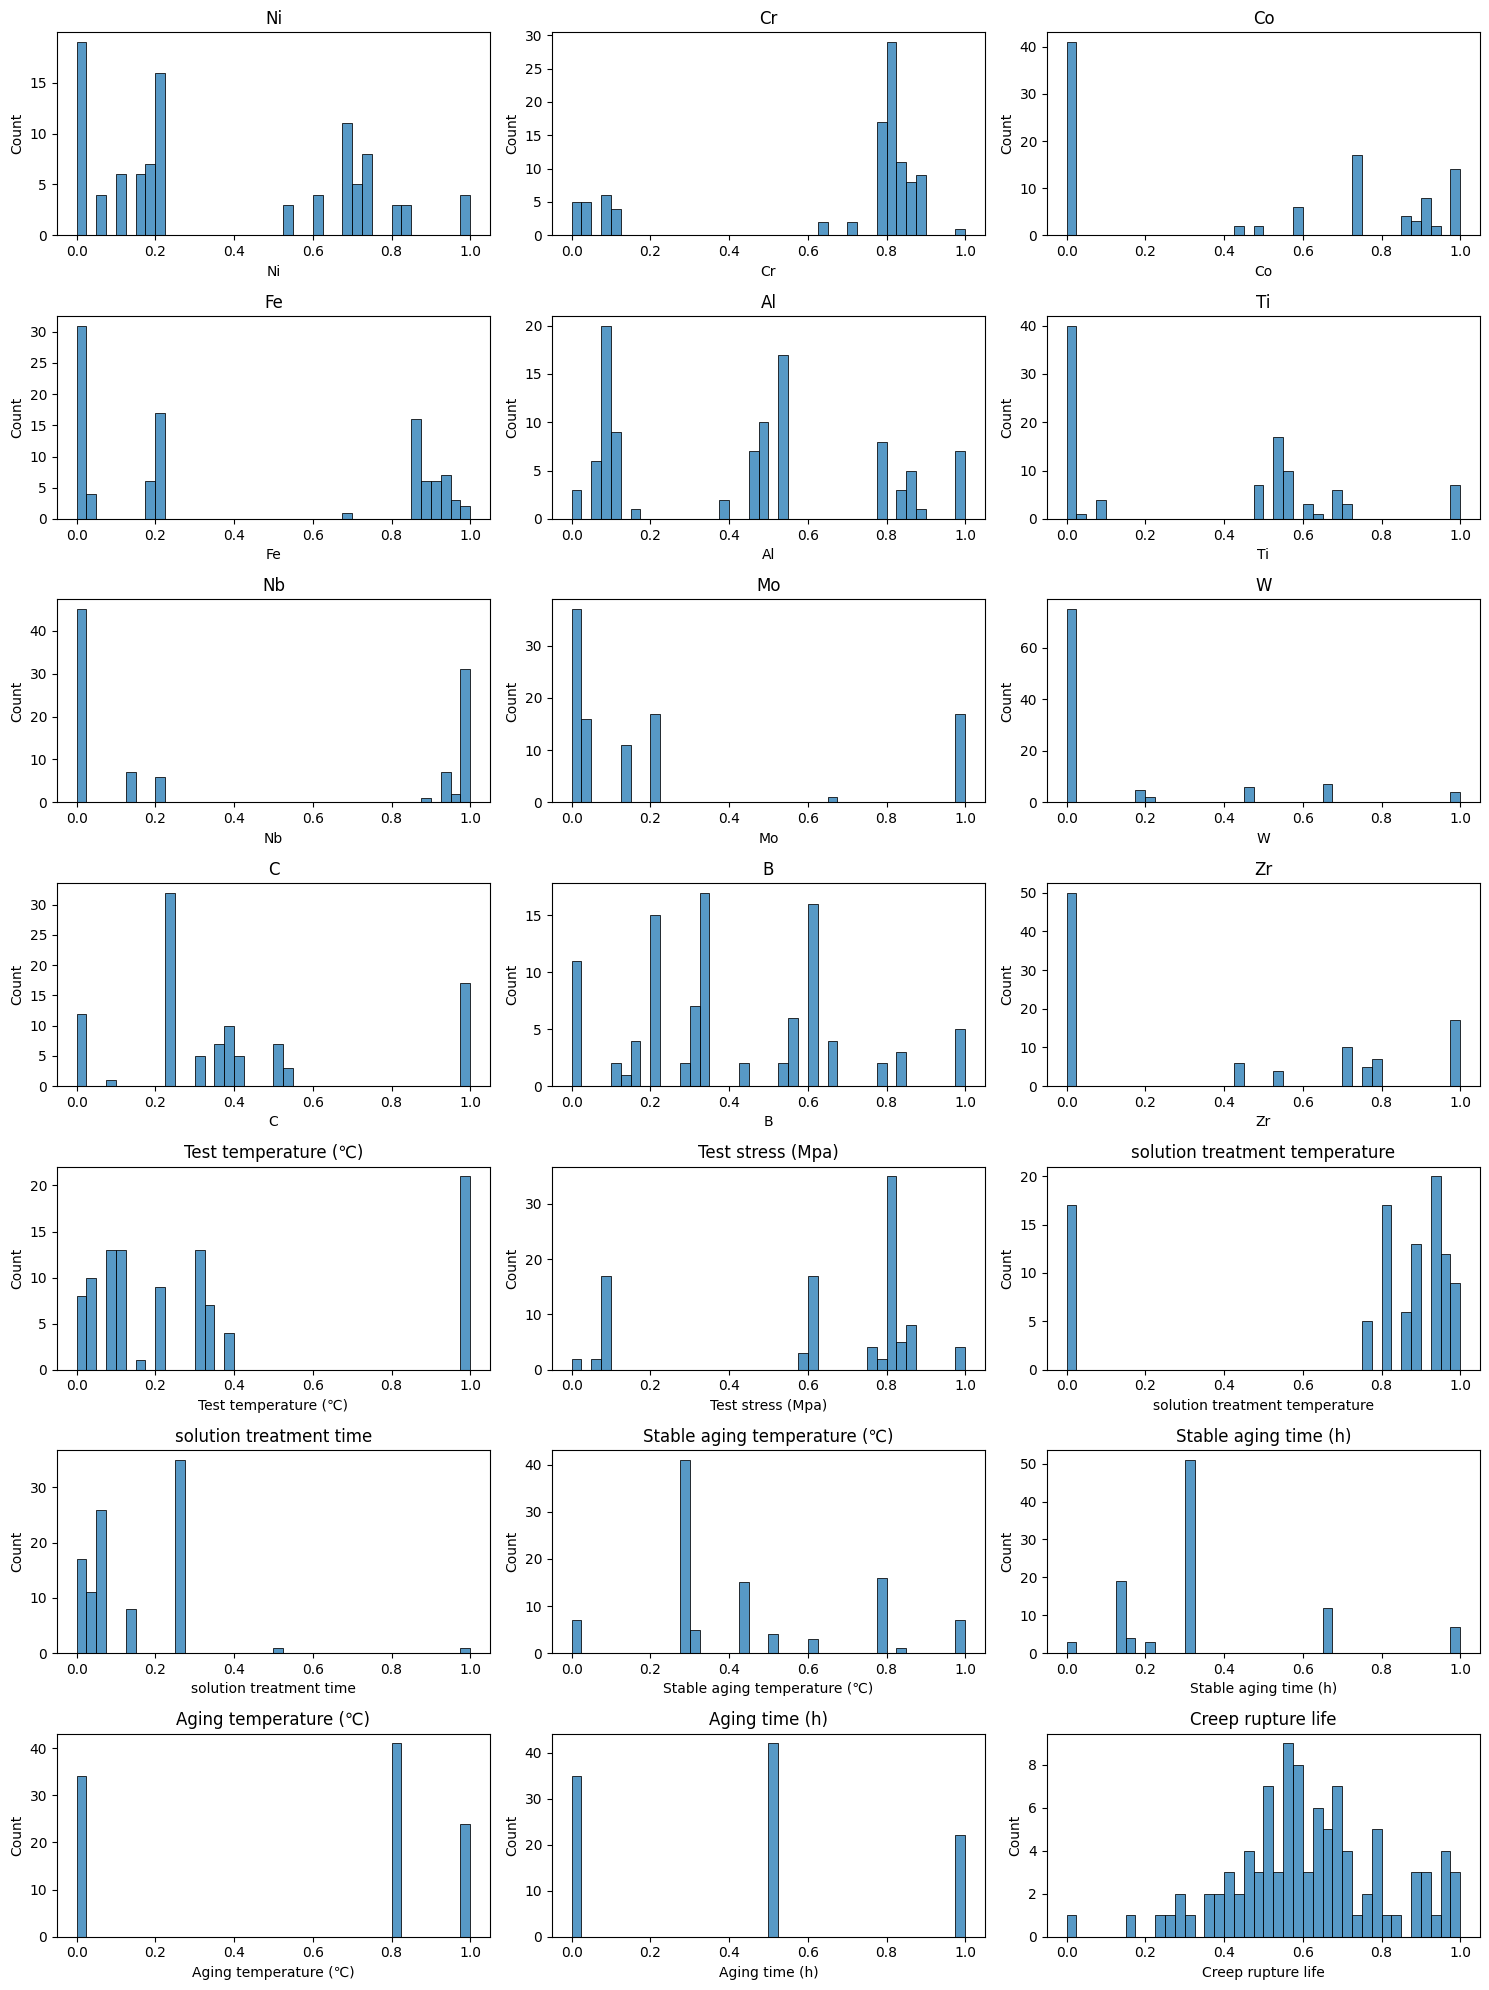

In [ ]:
par_scaled = df_scaled_custom.columns.to_list()
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for idx, column in enumerate(par_scaled):
    sns.histplot(df_scaled_custom[column], bins=40, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()